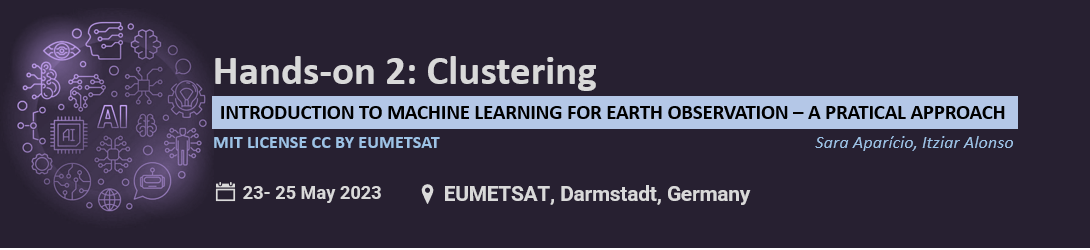


 ## <span style="color:red">SOLVED EXERCISE </span> 👀

### Goals:
Applying a k-means clustering algorithm to a Sentinel-3 image using **sklearn** python library.


### Steps:
- **Step 0:** Import all libraries
- **Step 1:** Load and read Sentinel-3 image (TIF) with **rasterio**
- **Step 2:** Reshape band into a vector (X) to fit the ML algoritm
- **Step 3:** Fit the algorithm to X and run **k-means** from **sklearn**
- **Step 4:** Display image results with **MatplotLib**
- **Step 5:** Plot clusters 
- **Step 6 - Go further:** Instead of one band (Step 1), read all bands 

# ___________________________________________________________________
### Step 0: Import all libraries
Need the following packages:
- **Sklearn** - machine learning library, containing many algorithms
- **Rasterio** - Reads and writes Tiff formats and provides a Python API based on Numpy N-dimensional arrays and GeoJSON
- **Numpy** - provides a simple and powerful data strcuture: n-dimensioanl array
- **Matplotlib** - visualization 

In [1]:
# Importing all the libraries
import numpy as np
from osgeo import gdal, gdal_array
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from matplotlib import pyplot
import rasterio as rio

#Tell GDAL to throw Python expectations, and register all drivers
#gdal.UseExceptions()
#gdal.AllRegister()

### Step 1: Load and read Sentinel-3 image (TIF) with Rasterio

#### Open an image and read only one specific band
The image is now opened with **rasterio**,and that band is then converted into a Numpy array which will facilitate performing different array operations on it. The image is a **2D array** dimenssion ("width x height") - in this example its shape is **(1430 , 2500)**.
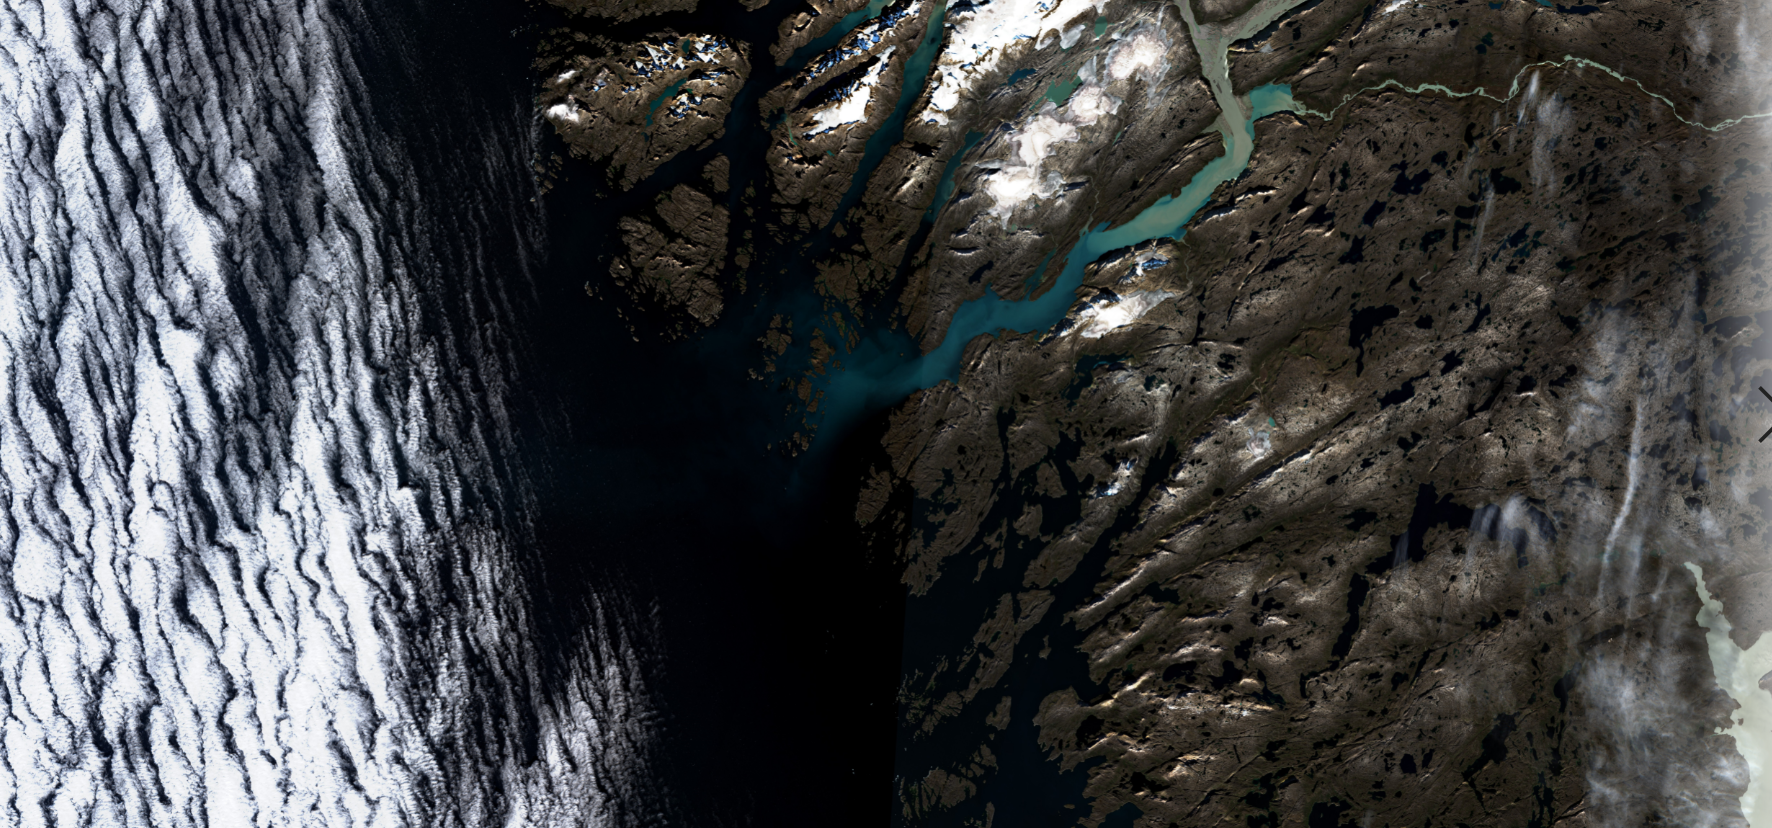


In [3]:
# path of the image
S3path = '/home/jupyter-mleo/ml-for-eo/00 Exercises September 2022/Session2/S3.tiff'

In [5]:
#open the image using its path with rio.open(name_of_path) 
img = rio.open(S3path)

#check the image shape with .shape
img.shape

(1430, 2500)

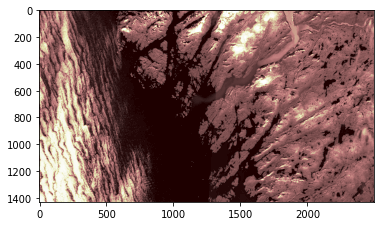

In [17]:
#visualize the image with pyplot.imshow(name_of_image.read(1))
pyplot.imshow(img.read(1), cmap='pink')

#plot the image with pyplot.show()
pyplot.show()

### Step 2: Reshape band into a vector (X) to fit the ML algoritm
In order to use the classifier we need to **reshape** this array, in order to flatten the data into the rows (unknowng lenght) and keep the columns as 1. This will take the format of **(rows,1)**. This results in a vector ([[x1], [x2], ..., [xn]]), where each xi element represents **a pixel** of the image. 
This is done the way below:

In [18]:
# create an empty array with same dimension and data type
imgxyb = np.empty((img.height, img.width, img.count), img.meta['dtype'])
# loop through the raster's bands to fill the empty array
for band in range(imgxyb.shape[2]):
    imgxyb[:,:,band] = img.read(band+1)
    
print('2d shape of image is:',imgxyb.shape)

2d shape of image is: (1430, 2500, 3)


In [19]:
# convert to 1d array
img1d=imgxyb[:,:,:6].reshape((imgxyb.shape[0]*imgxyb.shape[1],imgxyb.shape[2]))

X = img1d
print('Image now converted to 1D shape has shape of:',X.shape)

Image now converted to 1D shape has shape of: (3575000, 3)


### Step 3: Fit the algorithm to X and run k-means from sklearn
First thing is to **select how many clusters we want**. Let's assume **4 classes**. Then we are fitting these classes number to our data (X) defined above. Then we will assign a new variable to the results of this fitting called X_Cluster. After the labels have been assigned we then **reshape** this results back to the dimension of our original image.

- You can visit https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html to find more about K-means algorithm

K-means is a centroid-based algorithm, or a distance-based algorithm, where we calculate the distances to assign a point to a cluster. In K-Means, each cluster is associated with a centroid.

In [29]:
# create the model with KMeans(n_clusters = ? )
kmeans = KMeans(n_clusters = 14)

#fit the model with kmeans.fit(X)
kmeans.fit(X)

KMeans(n_clusters=14)

### Step 4: Display results with MatplotLib

1430


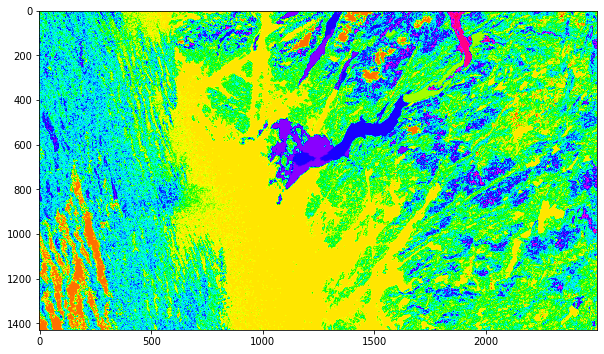

In [30]:
X_cluster = kmeans.labels_
X_cluster = X_cluster.reshape(img.shape)

print(len(X_cluster))

%matplotlib inline

plt.figure(figsize=(10,10))
plt.imshow(X_cluster,cmap="hsv") #hsv

plt.show()

#### Print result as a Tiff
We start by creating a dataset with the same dimensions as the input image. Then we save the clustered image array as an individual band in it.

### Step 5: Plot clusters
Iterates filtering the data according to each unique class one iteration at a time. The result we get is the final visualization of all the clusters.

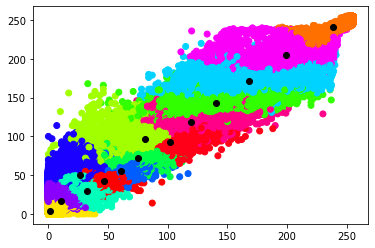

In [31]:
%matplotlib inline
plt.scatter(X[:,0], X[:,1], c=kmeans.labels_, cmap='hsv')
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='black')

### Step 6: Go further
- Instead of kmeans ...try importing another model. You can see available models (and how to import them here:
https://scikit-learn.org/stable/modules/classes.html#module-sklearn.cluster)
- Use multiple bands to fit the model - how does it change the clusters?
- Try to do the same exercice but with an image of your choice. 